In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(".\dataset\Salary_data.csv")

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Convert to numpy array 
X_train = np.array(dataset["YearsExperience"]) #features
Y_train = np.array(dataset["Salary"]) #target value
Y_train

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

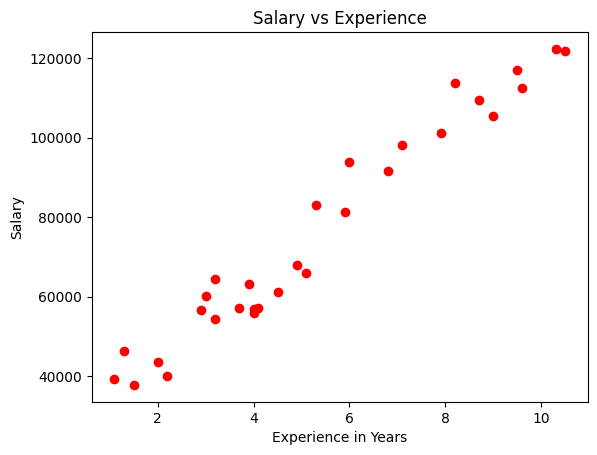

In [8]:
plt.scatter(X_train, Y_train, c = "r")
plt.title("Salary vs Experience")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.show()

In [364]:
# Define Model
def f(w, b ,X):
    return w * X + b

In [365]:
# # Define function to calculate cost
def compute_cost(m, X, Y, w , b):
    cost = np.sum(np.square(f(w, b, X) - Y)) / (2*m)
    return cost


In [406]:
# Function to compute gradient
def compute_gradient(X, Y, w, b, m):
    w_grad = np.sum((f(w, b, X) -Y) * X) / m # calculate gradient for w
    b_grad = np.sum(f(w, b ,X) - Y) / m  # calculate gradient for b
    return w_grad, b_grad



In [407]:
# Function for gradient descent
def gradient_descent(X, Y, w, b,iters, alpha):
    m = Y.shape[0]
    cost_history = []
    
    # Loop for gradient descent
    for i in range(1, iters+1):
        gradient_w, gradient_b = compute_gradient(X, Y, w, b, m)
        temp_w = w - alpha * gradient_w
        temp_b = b - alpha * gradient_b
        w = temp_w
        b = temp_b
        # w -=  alpha * gradient_w(X, Y, w, b,m)
        # b -=  alpha * gradient_b(X, Y, w, b,m)
             # Compute and store the cost
        cost = compute_cost(m, X, Y, w, b)
        cost_history.append(cost)
        if(i % 1000 ==0):
            print(f"i: {i:5}\tJ(m,c): {compute_cost(m, X, Y, w, b)}")
    return w,b, cost_history


In [408]:
# Initialize parameters
w = 0
b = 0
iters = 15000
alpha = 2e-2
w_final, b_final,cost_history =gradient_descent(X_train, Y_train, w, b, iters, alpha)


i:  1000	J(m,c): 15648268.266697535
i:  2000	J(m,c): 15635478.519518878
i:  3000	J(m,c): 15635475.861692913
i:  4000	J(m,c): 15635475.861140592
i:  5000	J(m,c): 15635475.86114049
i:  6000	J(m,c): 15635475.861140484
i:  7000	J(m,c): 15635475.861140473
i:  8000	J(m,c): 15635475.86114047
i:  9000	J(m,c): 15635475.86114047
i: 10000	J(m,c): 15635475.86114047
i: 11000	J(m,c): 15635475.86114047
i: 12000	J(m,c): 15635475.86114047
i: 13000	J(m,c): 15635475.86114047
i: 14000	J(m,c): 15635475.86114047
i: 15000	J(m,c): 15635475.86114047


In [409]:
print(f"The optimal values of w and b are {w_final:.4f} and {b_final:.4f} respectively.")

The optimal values of w and b are 9449.9623 and 25792.2002 respectively.


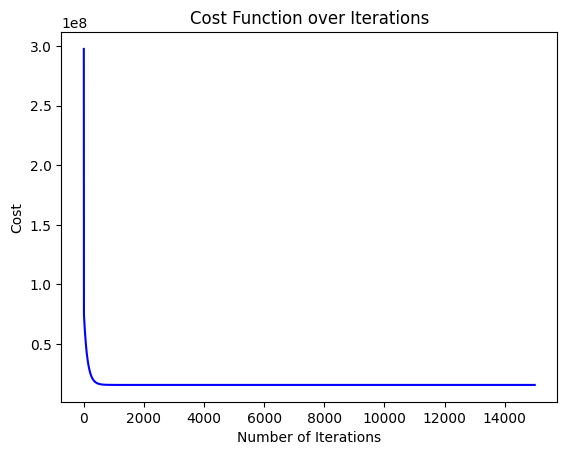

In [410]:
plt.plot(range(iters), cost_history , 'b')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [411]:
# Make predictions
y_pred = f(w_final, b_final, X_train)

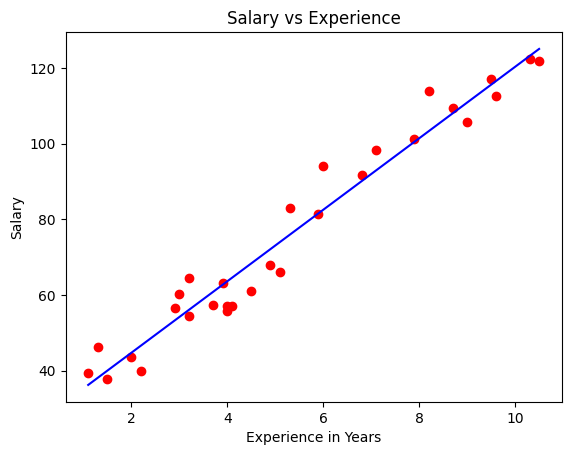

In [412]:
plt.scatter(X_train, Y_train/1000, c = "r")
plt.plot(X_train, y_pred/1000, c = "b")
plt.title("Salary vs Experience")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.show()

In [414]:
# Make Prediction
experience = 3.5

print(f"Salary corresponding to {experience} years of experience is {f(w_final, b_final, experience):.2f} dollars")

Salary corresponding to 3.5 years of experience is 58867.07 dollars
